In [11]:
import os
import pandas as pd
from tabulate import tabulate

def calculate_statistics(excel_file):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file, engine='openpyxl')

    # Count the total number of words in the original text
    total_original_words = df.iloc[:, 1].str.split().str.len().sum()

    # Count the total number of words in the translated text
    total_translation_words = df.iloc[:, 0].str.split().str.len().sum()

    # Calculate the percentage of omissions and additions
    total_segments = len(df)
    total_omissions = df.iloc[:, 0].isnull().sum()
    total_additions = df.iloc[:, 1].isnull().sum()

    percentage_omissions = (total_omissions / total_segments) * 100
    percentage_additions = (total_additions / total_segments) * 100

    # Calculate the ratio of Total Original to Total Translation
    ratio_or_tr = total_original_words / total_translation_words

    # Compare Total Original and Total Translation
    comparison_total_or_tr = '='
    if total_original_words > total_translation_words:
        comparison_total_or_tr = '>'
    elif total_original_words < total_translation_words:
        comparison_total_or_tr = '<'

    # Create a DataFrame to display the statistics
    statistics_df = pd.DataFrame({
        'TITLE': [os.path.basename(excel_file)],
        'Total Original': [total_original_words],
        'Comparison Total Or/Tr': [comparison_total_or_tr],
        'Total Translation': [total_translation_words],
        '% Omissions': [percentage_omissions],
        '% Additions': [percentage_additions],
        'Ratio Or/Tr': [ratio_or_tr]
    })

    return statistics_df

def main():
    excel_retrieved_directory = os.getcwd()  # Directory containing Excel files
    all_statistics = []

    # Iterate over each file in the directory
    for filename in os.listdir(excel_retrieved_directory):
        if filename.endswith(".xlsx"):
            excel_file = os.path.join(excel_retrieved_directory, filename)
            statistics_df = calculate_statistics(excel_file)
            all_statistics.append(statistics_df)

    # Concatenate statistics for all files into a single DataFrame
    combined_statistics = pd.concat(all_statistics, ignore_index=True)

    # Create the directory for output files
    output_directory = os.path.join(excel_retrieved_directory, 'Outputs_FINAL')
    os.makedirs(output_directory, exist_ok=True)

    # Save the combined statistics to a new Excel file
    output_file = os.path.join(output_directory, 'Output1.xlsx')
    combined_statistics.to_excel(output_file, index=False)

    # Print the combined statistics table
    print(tabulate(combined_statistics, headers='keys', tablefmt='pretty'))

if __name__ == "__main__":
    main()


+----+---------------------------------------------------------+----------------+------------------------+-------------------+----------------------+----------------------+--------------------+
|    |                          TITLE                          | Total Original | Comparison Total Or/Tr | Total Translation |     % Omissions      |     % Additions      |    Ratio Or/Tr     |
+----+---------------------------------------------------------+----------------+------------------------+-------------------+----------------------+----------------------+--------------------+
| 0  |    1921 CRAINQUEBILLE FRANCE PROTOPATSIS FR EL.xlsx     |    36037.0     |           >            |      34990.0      |  7.098197866862817   | 0.03677822728944465  | 1.0299228350957417 |
| 1  |    1923 MADAME BOVARY FLAUBERT THEOTOKIS FR EL.xlsx     |    115902.0    |           >            |     115558.0      |  0.2406159769008662  | 0.03208213025344883  | 1.0029768601048823 |
| 2  |         1924 ENFER BARB

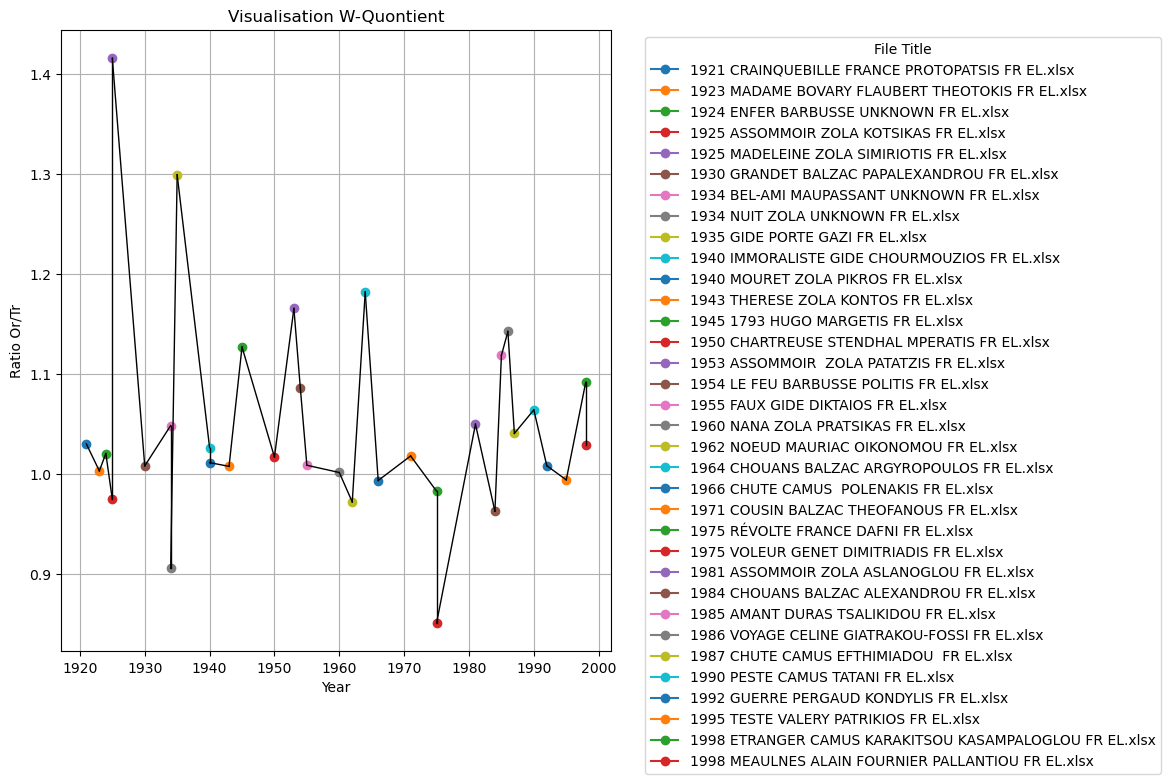

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve directory path from environment variable
directory = os.getenv('DIRECTORY_PATH')
if not directory:
    raise ValueError("The directory path is not set. Please set the DIRECTORY_PATH environment variable.")

# Read Output1.xlsx
combined_file_path = os.path.join(directory, 'Output1.xlsx')
df = pd.read_excel(combined_file_path)

# Extract years from titles
df['Year'] = df['TITLE'].str.extract(r'(\d{4})').astype(int)

# Plotting
plt.figure(figsize=(12, 8))
for i, row in df.iterrows():
    plt.plot(row['Year'], row['Ratio Or/Tr'], marker='o', linestyle='-', label=row['TITLE'])

# Connect the data points with lines
for i in range(len(df)-1):
    plt.plot([df.iloc[i]['Year'], df.iloc[i+1]['Year']], [df.iloc[i]['Ratio Or/Tr'], df.iloc[i+1]['Ratio Or/Tr']], color='black', linestyle='-', linewidth=1)

# Customize plot
plt.title('Visualisation W-Quontient')
plt.xlabel('Year')
plt.ylabel('Ratio Or/Tr')
plt.xticks(range(1920, 2001, 10))
plt.grid(True)
plt.legend(title='File Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to file
plt.savefig(os.path.join(directory, 'Visualisation W-Quontient.png'), bbox_inches='tight')
plt.show()


In [15]:
#Υπολογισμός αριθμητικού μ΄έσου, διαμέσου, τυπικής απόκλισης και συντελεστή μεταβλητότητας του ΛΜ
import os
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve directory path from environment variable
directory = os.getenv('DIRECTORY_PATH')
if not directory:
    raise ValueError("The directory path is not set. Please set the DIRECTORY_PATH environment variable.")
    
file_path = os.path.join(directory, "Output1.xlsx")

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Calculate mean, median, and standard deviation of the "Ratio Or/Tr" column
mean_ratio_or_tr = df["Ratio Or/Tr"].mean()
median_ratio_or_tr = df["Ratio Or/Tr"].median()
std_ratio_or_tr = df["Ratio Or/Tr"].std()

# Calculate coefficient of variation
coefficient_of_variation = std_ratio_or_tr / mean_ratio_or_tr

# Print the results
print(f"Mean (Arithmetic Mean): {mean_ratio_or_tr}")
print(f"Median: {median_ratio_or_tr}")
print(f"Standard Deviation: {std_ratio_or_tr}")
print(f"Coefficient of Variation: {coefficient_of_variation}")


Mean (Arithmetic Mean): 1.048616488365624
Median: 1.0191418083932735
Standard Deviation: 0.10404306959097451
Coefficient of Variation: 0.09921937213970025


In [16]:
#Υπολογισμός αριθμητικού μέσου και διαμ΄έσου Απαλοιφών και Προσθηκών 
import os
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve directory path from environment variable
directory = os.getenv('DIRECTORY_PATH')
if not directory:
    raise ValueError("The directory path is not set. Please set the DIRECTORY_PATH environment variable.")
    
file_path = os.path.join(directory, "Output1.xlsx")

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Calculate mean and median of the "% Omissions" column
mean_omissions = df["% Omissions"].mean()
median_omissions = df["% Omissions"].median()

# Calculate mean and median of the "% Additions" column
mean_additions = df["% Additions"].mean()
median_additions = df["% Additions"].median()

# Print the results
print("Statistics for '% Omissions' column:")
print(f"Mean: {mean_omissions}")
print(f"Median: {median_omissions}")
print("\n")
print("Statistics for '% Additions' column:")
print(f"Mean: {mean_additions}")
print(f"Median: {median_additions}")


Statistics for '% Omissions' column:
Mean: 1.881227194062385
Median: 0.43051808892252064


Statistics for '% Additions' column:
Mean: 0.4284489939069453
Median: 0.06303160635451681


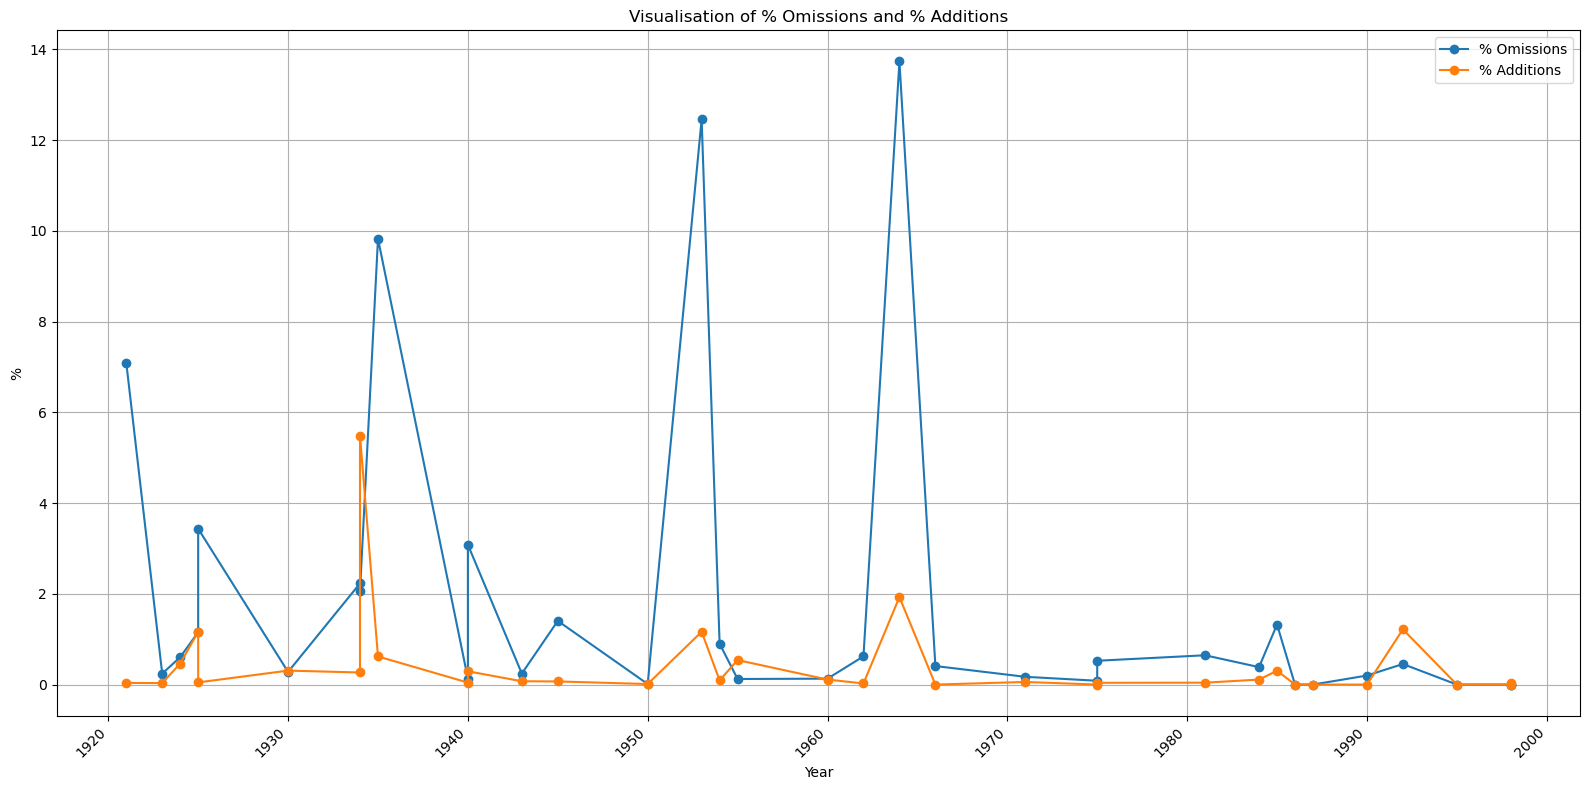

In [28]:
#Οπτικοποίηση ποσοστών Απαλοιφής Προσθήκης στον χρονικό άξονα
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve directory path from environment variable
directory = os.getenv('DIRECTORY_PATH')
if not directory:
    raise ValueError("The directory path is not set. Please set the DIRECTORY_PATH environment variable.")

# Read Output1.xlsx
combined_file_path = os.path.join(directory, 'Output1.xlsx')
df = pd.read_excel(combined_file_path)

# Extract years from titles
df['Year'] = df['TITLE'].str.extract(r'(\d{4})').astype(int)

# Plotting
plt.figure(figsize=(16, 8))  # Set figure size
plt.plot(df['Year'], df['% Omissions'], marker='o', linestyle='-', label='% Omissions')
plt.plot(df['Year'], df['% Additions'], marker='o', linestyle='-', label='% Additions')

# Customize plot
plt.title('Visualisation of % Omissions and % Additions')
plt.xlabel('Year')
plt.ylabel('%')
plt.xticks(range(1920, 2001, 10), [str(year) for year in range(1920, 2001, 10)], rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save plot to file
plt.savefig(os.path.join(directory, 'Visualisation_Omissions_Additions.png'), bbox_inches='tight')
plt.show()


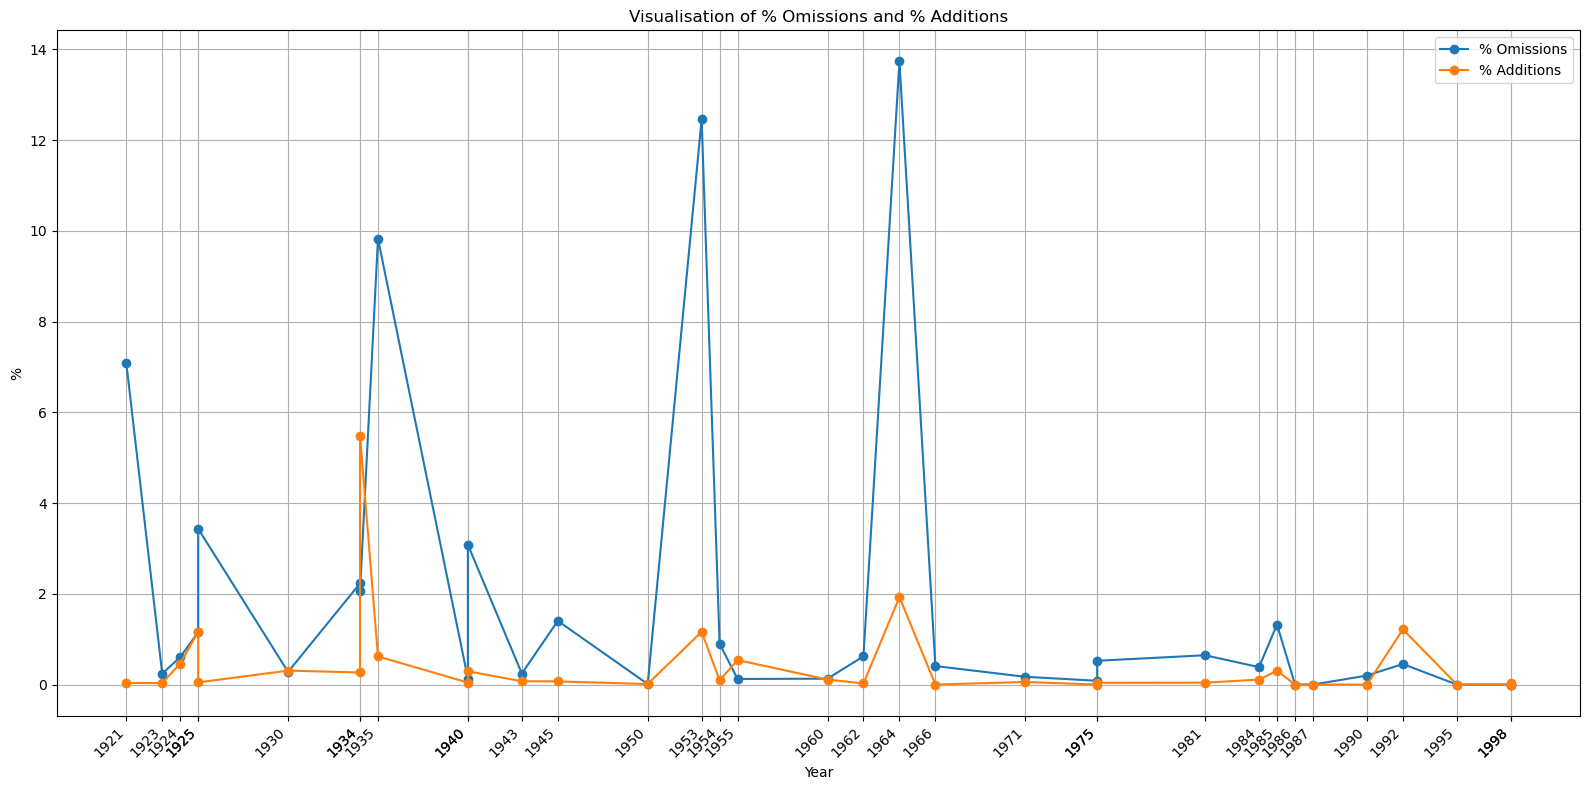

In [30]:
#οπτικοποίηση των απαλοιφών παραλειψεων με εμφανιση τίτλων στον οριζ΄όντιο άξονα

import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve directory path from environment variable
directory = os.getenv('DIRECTORY_PATH')
if not directory:
    raise ValueError("The directory path is not set. Please set the DIRECTORY_PATH environment variable.")

# Read Output1.xlsx
combined_file_path = os.path.join(directory, 'Output1.xlsx')
df = pd.read_excel(combined_file_path)

# Extract years from titles
df['Year'] = df['TITLE'].str.extract(r'(\d{4})').astype(int)

# Plotting
plt.figure(figsize=(16, 8))  # Set figure size
plt.plot(df['Year'], df['% Omissions'], marker='o', linestyle='-', label='% Omissions')
plt.plot(df['Year'], df['% Additions'], marker='o', linestyle='-', label='% Additions')

# Customize plot
plt.title('Visualisation of % Omissions and % Additions')
plt.xlabel('Year')
plt.ylabel('%')
plt.xticks(df['Year'], df['TITLE'].str.split().str[0], rotation=45, ha='right')  # Set titles as xtick labels
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save plot to file
plt.savefig(os.path.join(directory, 'Visualisation_Omissions_Additions.png'), bbox_inches='tight')
plt.show()


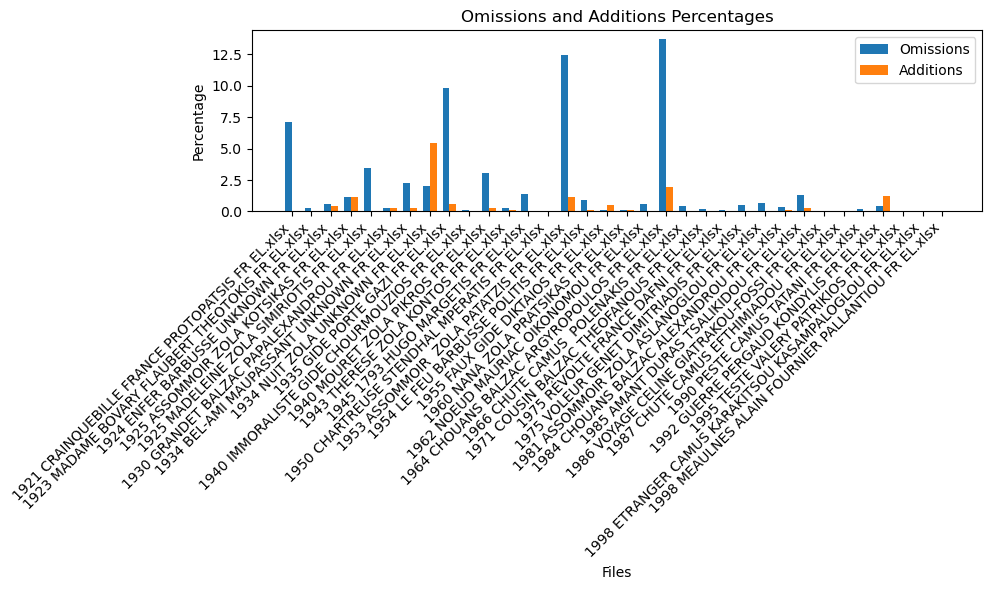

In [1]:
#οπτικοποίηση απαλοιφών και προσθηκών
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_statistics(excel_file):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file, engine='openpyxl')

    # Count the total number of segments
    total_segments = len(df)

    # Count the total number of omissions
    total_omissions = df.iloc[:, 0].isnull().sum()

    # Count the total number of additions
    total_additions = df.iloc[:, 1].isnull().sum()

    # Calculate the percentage of omissions and additions
    percentage_omissions = (total_omissions / total_segments) * 100
    percentage_additions = (total_additions / total_segments) * 100

    return percentage_omissions, percentage_additions

def main():
    excel_retrieved_directory = os.getcwd()  # Directory containing Excel files (current working directory)

    # Lists to store percentages
    omissions_percentages = []
    additions_percentages = []
    filenames = []

    # Iterate over each file in the directory
    for filename in os.listdir(excel_retrieved_directory):
        if filename.endswith(".xlsx"):
            excel_file = os.path.join(excel_retrieved_directory, filename)
            omissions_percentage, additions_percentage = calculate_statistics(excel_file)
            omissions_percentages.append(omissions_percentage)
            additions_percentages.append(additions_percentage)
            filenames.append(filename)

    # Create a bar chart to visualize percentages
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size for better readability
    x = range(len(filenames))
    bar_width = 0.35
    opacity = 0.8

    rects1 = ax.bar(x, omissions_percentages, bar_width, label='Omissions')
    rects2 = ax.bar([p + bar_width for p in x], additions_percentages, bar_width, label='Additions')

    ax.set_xlabel('Files')
    ax.set_ylabel('Percentage')
    ax.set_title('Omissions and Additions Percentages')
    ax.set_xticks([p + bar_width / 2 for p in x])
    ax.set_xticklabels(filenames, rotation=45, ha='right')  # Rotate titles by 45 degrees and align them to the right
    ax.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [6]:
#εγγραφή νέου excel με απαλοιφές ανά κείμενο (αντιγραφη ολόκληρου το περιεχομένου και highlight)
import os
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve the input and output directories from environment variables
input_dir = os.getenv('INPUT_DIR')
output_dir = os.getenv('OUTPUT_DIR')

if not input_dir or not output_dir:
    raise ValueError("The input and/or output directory paths are not set. Please set the INPUT_DIR and OUTPUT_DIR environment variables.")

# Define the output file path
output_file = os.path.join(output_dir, 'Omissions All texts.xlsx')

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to generate a sheet name from a file name
def generate_sheet_name(filename):
    base_name = os.path.splitext(filename)[0]
    words = base_name.split()[:3]
    sheet_name = ' '.join(words)
    return sheet_name[:31]

# Create a new Excel writer object
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for filename in os.listdir(input_dir):
        if filename.endswith('.xlsx'):
            file_path = os.path.join(input_dir, filename)
            df = pd.read_excel(file_path)
            sheet_name = generate_sheet_name(filename)
            df.to_excel(writer, sheet_name=sheet_name, index=False)

            workbook  = writer.book
            worksheet = writer.sheets[sheet_name]

            highlight_format = workbook.add_format({'bg_color': '#FFEB9C', 'font_color': '#9C6500'})

            worksheet.conditional_format('A2:A{}'.format(len(df) + 1), {
                'type': 'formula',
                'criteria': 'AND(ISBLANK(A2), NOT(ISBLANK(B2)))',
                'format': highlight_format
            })

print(f'New Excel file with omissions has been created at: {output_file}')



New Excel file with omissions has been created at: D:\ΔΙΔΑΚΤΟΡΙΚΗ ΠΡΟΤΑΣΗ\ΣΩΜΑ ΛΟΓΟΤΕΧΝΙΚΩΝ ΚΕΙΜΕΝΩΝ\ΠΑΡΑΛΛΗΛΟ ΗΣΚ ΑΝΑΦΟΡΑΣ\MARIA CORPUS DRIVE\EXCEL RETRIEVED\Outputs_FINAL\Omissions All texts.xlsx


In [14]:
#συνέχεια του προηγούμενου, εγγραφή νέου excel με απαλοιφές ανά κείμενο (αντιγραφη ολόκληρου το περιεχομένου και highlight σε όλη τη γραμμή)
import os
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env file, if used
load_dotenv()

# Retrieve the input and output file paths from environment variables
input_file = os.getenv('INPUT_FILE')
output_file = os.getenv('OUTPUT_FILE')

if not input_file or not output_file:
    raise ValueError("The input and/or output file paths are not set. Please set the INPUT_FILE and OUTPUT_FILE environment variables.")

# Read the Excel file
excel_data = pd.ExcelFile(input_file)

# Create a new Excel writer object
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for sheet_name in excel_data.sheet_names:
        # Read each sheet into a DataFrame
        df = excel_data.parse(sheet_name)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

        workbook = writer.book
        worksheet = writer.sheets[sheet_name]

        # Create a format for highlighting cells (background color only)
        highlight_format = workbook.add_format({'bg_color': '#FFEB9C'})

        # Apply conditional formatting to highlight the first three columns of each row
        num_rows, num_cols = df.shape
        for row in range(2, num_rows + 2):  # Excel rows are 1-indexed
            worksheet.conditional_format('A{}:C{}'.format(row, row), {
                'type': 'formula',
                'criteria': 'AND(ISBLANK($A{}), NOT(ISBLANK($B{})))'.format(row, row),
                'format': highlight_format
            })

print(f'New Excel file with highlighted omissions has been created at: {output_file}')



New Excel file with highlighted omissions has been created at: D:\ΔΙΔΑΚΤΟΡΙΚΗ ΠΡΟΤΑΣΗ\ΣΩΜΑ ΛΟΓΟΤΕΧΝΙΚΩΝ ΚΕΙΜΕΝΩΝ\ΠΑΡΑΛΛΗΛΟ ΗΣΚ ΑΝΑΦΟΡΑΣ\MARIA CORPUS DRIVE\EXCEL RETRIEVED\Outputs_FINAL\Omissions all texts HIGHLIGHTED.xlsx


In [ ]:
#lexical density Chatzikyriakidis, 1 text
import pandas as pd
import spacy

# Load SpaCy models for French and Greek
nlp_fr = spacy.load("fr_core_news_sm")
nlp_el = spacy.load("el_core_news_sm")

def lexical_density(text, nlp):
    if not isinstance(text, str):  # Check if the input is not a string
        return None  # Skip non-string inputs
    doc = nlp(text)
    total_words = sum(1 for token in doc if token.is_alpha)
    if total_words < 10:  # Skip processing if the sentence is less than 10 words long
        return None
    lexical_tags = {'NOUN', 'ADJ', 'VERB', 'ADV'}
    lexical_words = sum(1 for token in doc if token.pos_ in lexical_tags)
    return lexical_words / total_words if total_words > 0 else 0

# Load the data from the Excel file
file_path = '1945_1973_HUGO.xlsx'
data = pd.read_excel(file_path)

# Apply the lexical density calculations to the 'FR' and 'EL' columns, filtering out non-string and short entries
data['Lexical_Density_FR'] = data['FR'].dropna().apply(lambda x: lexical_density(x, nlp_fr) if isinstance(x, str) else None)
data['Lexical_Density_EL'] = data['EL'].dropna().apply(lambda x: lexical_density(x, nlp_el) if isinstance(x, str) else None)

# Remove rows where lexical density could not be calculated (i.e., None values)
data = data.dropna(subset=['Lexical_Density_FR', 'Lexical_Density_EL'])

# Calculate the absolute difference in lexical densities
data['Density_Difference'] = abs(data['Lexical_Density_FR'] - data['Lexical_Density_EL'])

# Sort by the largest differences in lexical density and display the top entries
sorted_density_differences = data.sort_values(by='Density_Difference', ascending=False)
top_entries = sorted_density_differences[['FR', 'EL', 'Lexical_Density_FR', 'Lexical_Density_EL', 'Density_Difference']].head(100)

# Optionally, print or save the top entries to a new Excel file
print(top_entries)
# top_entries.to_excel('lexical_density_differences.xlsx')
